# Introdução a Data Science - Alura
## 1. Carregar as bibliotecas

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Fazer upload dos datasets
Na aba lateral do Google Colab, entrar no menu arquivo, clicar com o botão direito do mouse na área em branco da aba e selecionar upload. Dirija-se ao diretório onde encontra-se o arquivo csv que deseja carregar e o selecione.  
Neste exercício, começaremos carregando os arquivos:  
* ratings.csv
* movies.csv

## 3. Abrindo arquivos para exploração
O primeiro arquivo que iremos trabalhar é o __ratings.csv__  
Abaixo, criamos a variável __`notas`__ e atribuímos a ela o código para leitura do arquivo: __`pd.read_csv("ratings.csv")`__. Posteriormente, exibimos os 5 primeiros valores da tabela através de: __`notas.head()`__.


> __obs:__ mais precisamente, estamos criando um objeto __`notas`__ do tipo dataframe



In [5]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## 4. Formato da tabela
Com o código abaixo podemos visualizar a quantidade de linhas e colunas de nossa tabela.

In [6]:
notas.shape

(100836, 4)

## 5. Renomeando colunas
__`notas`__ é um objeto do pandas com várias colunas e 0 ou *n* linhas, esse é um tipo conhecido como **Pandas DataFrame**.  

saiba mais em: [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [7]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 5.1. Vendo as notas
Ao solicitar uma única coluna, por padrão, obtemos uma __série de números__ chamada de __Pandas Series__.  
Saiba mais em: [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [8]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [9]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

Perceba que nos dois códigos acima obtemos a mesma __série__ de formas diferentes.

### 5.2. Visualizando as notas que foram dadas
Para sabermos os valores colocados em determinada coluna de maneira única, utilizamos o __`unique()`__

In [10]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

### 5.3. Visualizando quantas vezes as notas foram dadas
Para sabermos quantas vezes os valores únicos se repetem, utilizamos o __`value_counts()`__

In [11]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

### 5.4. Média e Mediana
Podemos exibir a __média__ ou a __mediana__ de dois modos diferentes, como demonstrado abaixo.

In [12]:
media = notas['nota'].mean()
mediana = notas['nota'].median()
print('a média é {}'.format(media))
print('a mediana é {}'.format(mediana))

media2 = notas.nota.mean()
mediana2 = notas.nota.median()
print(media2)
print(mediana2)

a média é 3.501556983616962
a mediana é 3.5
3.501556983616962
3.5


### 5.5. Extraindo outras medidas

In [13]:
descricao = notas.nota.describe()
print(descricao)

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64


## 6. Visualizando dados com histrogramas e boxplot
Normalmente, desejamos apresentar nossos dados de maneira visual. A _impressão_ visual do conjunto de dados é conhecida como _plotagem_. O pandas possuí o método __`plot()`__ para nos ajudar nessa tarefa.  
### 6.1. Plot - Histograma
Nossa primeira plotagem não apresenta um gráfico útil. Para melhorarmos sua visualização definiremos o tipo através do argumento __`kind`__ com o valor  __`hist`__ (basicamente estamos dizendo que o gráfico deve ser do __tipo histograma__).  
> Código alternativo:  
__`notas.nota.plot(kind='hist')`__  

__obs:__ note na primeira parte do código acima que estamos acessando o __dataframe__ __`notas`__ e solicitando a _plotagem_ da __série__ __`nota`__


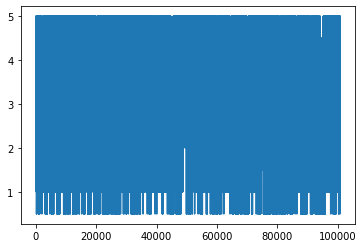

In [14]:
notas.nota.plot()

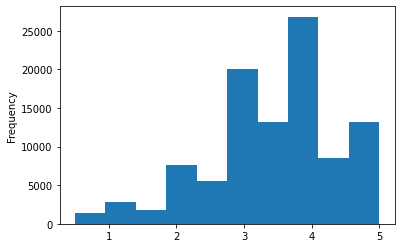

In [15]:
notas['nota'].plot(kind='hist')

### 6.2. Plot - Boxplot
Neste momento, utilizaremos a biblioteca __Seaborn__ para _plotar_ um gráfico do tipo __boxplot__.  
O __boxplot__ nos permite visualisar graficamente as medidas obtidas com o __describe__.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


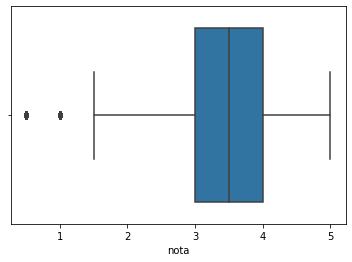

In [16]:
sns.boxplot(notas.nota)

Na representação acima, a mediana encontra-se no meio do retângulo azul. O retângulo azul representa 50% dos dados, sendo 25% para avaliações entre 3 e 3,5, e 25% para avaliações entre 3,5 e 4. Temos ainda que 25% das avaliações tem nota acima de 4 e outros 25% abaixo de 3, enquanto notas entre 0,5 e 1,5 tem pouca presença.

## 7. Análise Exploratória
Nesta etapa iremos analisar filmes específicos do nosso conjunto de dados.  
Vamos abrir o arquivo __movies.csv__ assim como fizemos com o arquivo __ratings.csv__.

In [17]:
filmes = pd.read_csv("movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Abaixo, renomeamos as colunas.

In [18]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 7.1. Cruzando informações de dataframes
Para obter as notas de um dos filmes precisamos cruzar as informações dos __dataframes__ __`notas`__ e __`filmes`__.  
Faremos isso criando uma __query__ (uma "pergunta"), comparando o valor __1__ (correspondente ao __`filmeId`__ de _Toy Story_).

In [19]:
notas.query('filmeId==1').head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Perceba que a tabela retorna as notas referentes apenas ao __`filmeId`__ __1__.  
Abaixo visualizamos apenas o __`filmeId`__ __1__.

In [20]:
filmes.query('filmeId==1')

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


#### 7.1.1. Analisando notas específicas por filme
Abaixo, consultamos o __dataframe__ __`notas`__ e solicitamos a __média__ da coluna __`nota`__. Basicamente, o que fizemos foi obter uma __série__ e solicitar a __média__.

In [21]:
toystory = notas.query('filmeId==1').nota.mean()
jumanji = notas.query('filmeId==2').nota.mean()
print('a média de Toy Story é ', toystory)
print('a média de Jumanji é ', jumanji)

a média de Toy Story é  3.9209302325581397
a média de Jumanji é  3.4318181818181817


### 7.2. Agrupamento
Poderíamos repetir o processo acima para extrair a média das notas de outros filmes da lista, porém, fazer isso manualmente seria muito trabalhoso. Para agilizar este processo devemos agrupar as notas pela coluna __`filmeId`__.  
A primeira parte do código faz o agrupamento, e em seguida atribuimos a função __`mean()`__ para obter a média e o método head() para exibir os 5 primeiros resultados de nossa pesquisa.  
Por fim, definimos a série através de __`["nota"]`__, exibindo a média apenas da coluna desejada.



In [22]:
# abaixo, ambos os códigos retornam o mesmo conteúdo
# exceto pelo uso do método head()
#notas.groupby('filmeId').mean().head()["nota"]
medias_por_filme = notas.groupby('filmeId').mean().nota
# agora aplicamos o método head() na variável criada para exibição
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

No processo acima, fizemos as _queries_ e agrupamos valores para efetuar operações.  
A partir de agora podemos _plotar_ um novo _histograma_ com o Pandas, diretamente da série.

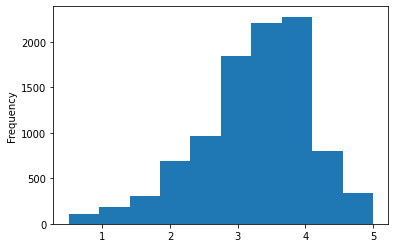

In [23]:
medias_por_filme.plot(kind="hist")

Também podemos utilizar nossos dados agrupados no __Seaborn__.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


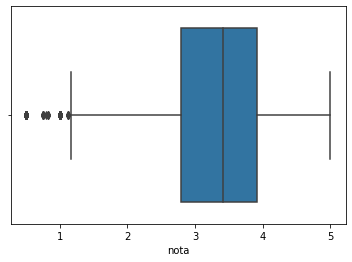

In [24]:
sns.boxplot(medias_por_filme)

In [25]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Repare que a mediana das médias é 3.41; 25% delas estão abaixo de 2.8; e outros 25% estão acima de 3.9. O Pandas também é capaz de gerar gráficos boxplot, assim como o Seaborn também é capaz de fazer histogramas. Nesse caso, o histograma do Seaborn é chamado de _gráfico de distribuição_, ou __`distplot()`__:

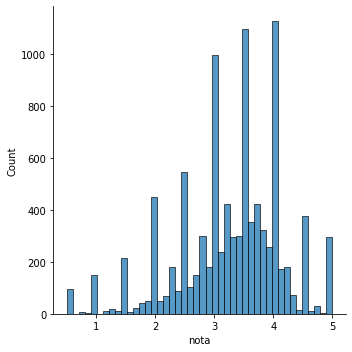

In [26]:
sns.displot(medias_por_filme)

Mas esse histograma parece diferente daquele do Pandas, não?  
Isso acontece pois o histograma é gerado com base em um número de separações (as barras).  
No caso do Pandas, tínhamos 10 separações; e no Seaborn, bem mais que isso. Com o argumento __`bins`__, podemos definir esse número. Se atribuirmos 10, por exemplo, teremos um histograma praticamente idêntico ao do Pandas:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


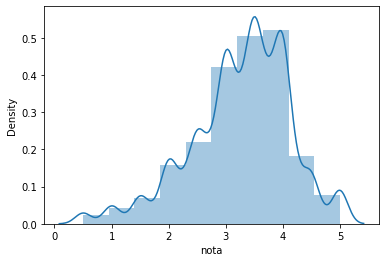

In [27]:
sns.distplot(medias_por_filme, bins = 10)

FutureWarning --> distplot será removido em versões futuras.  


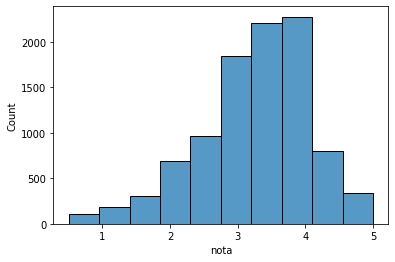

In [28]:
sns.histplot(medias_por_filme, bins = 10)

### 7.3. Biblioteca matplotlib
Carregamos a biblioteca __Matplotlib__ com as demais no iníco de nosso documento por conveniência.  
As bibliotecas __Pandas__ e __Seaborn__ utilizam o __Matplotlib__ por "debaixo dos panos", esta é considerada uma biblioteca de mais baixo nível, sendo assim, também podemos geras os gráficos anteriores com ela.  
Veja abaixo:

Text(0.5, 1.0, 'Histograma da Médias dos Filmes')

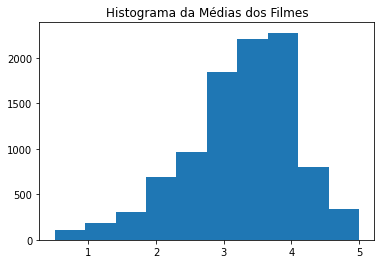

In [29]:
plt.hist(medias_por_filme)
plt.title('Histograma da Médias dos Filmes')

Abaixo, um boxplot com a definição de seus eixos e ajuste das dimensões do gráfico.

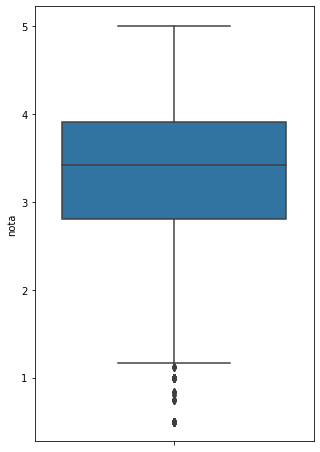

In [30]:
plt.figure(figsize=(5, 8))
sns.boxplot(y=medias_por_filme)

## 8. Tipos de variáveis
Neste momento estamos inserindo um novo DataFrame.  

In [32]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### 8.1 Classificando as variáveis
Podemos encontrar dois tipos de variáveis, as __categóricas__ e as __ordinais__.  
As variáveis __categóricas__ são aquelas que __não__ possuem valores quantitativos, ao contrário, são definidas por várias categorias, ou seja, representam uma classificassão dos indivíduos. As variáveis __categóricas__ podem ser __nominais__ ou __ordinais__.  
Quando estamos trabalhando com categorias ordinais, existe uma ordenação de seus elementos, por exemplo:  
__Escolaridade:__  
* primeiro grau
* segundo grau
* terceiro grau  

__Meses do ano:__
* Janeiro
* Fevereiro
* Março
* etc  

No exemplo abaixo, o idioma é uma variável __categórica nominal__. Não existe uma ordem que defina como devem ser apresentados os idiomas.


In [33]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Abaixo, iremos extrari informações de uma variável categórica.  
A maneira mais básica de compararmos categorias é descobrindo quantas vezes cada uma delas aparece.

In [34]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
ro       2
ar       2
id       2
cs       2
ta       2
nb       1
vi       1
ps       1
el       1
te       1
no       1
tr       1
is       1
xx       1
pl       1
ky       1
hu       1
sl       1
af       1
Name: original_language, dtype: int64

Acima, extraímos uma série (uma sequência de dados de uma única coluna).  
Apesar de parecer que temos duas colunas, a primeira trata-se apenas do índice. Veja abaixo.

In [36]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'he', 'th', 'ro', 'ar', 'id', 'cs', 'ta', 'nb',
       'vi', 'ps', 'el', 'te', 'no', 'tr', 'is', 'xx', 'pl', 'ky', 'hu', 'sl',
       'af'],
      dtype='object')

In [37]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

### 8.2. Criando um DataFrame
Podemos transformar nossa _serie_ em um _dataframe_ através de `.to_frame()`.  
Caso deseje ou seja necessário, é possível resetar o índice adicionando o método `.reset_index()`

In [40]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


### 8.3. Visualizando as categorias
Abaixo, plotaremos um gráfico de barras.
Isso foi possível com a criação do _dataframe_, pois a _serie_ nos oferecia apenas uma coluna.  
Conhecendo o nome de nosso _dataframe_ e suas colunas, podemos definir a forma do gráfico.

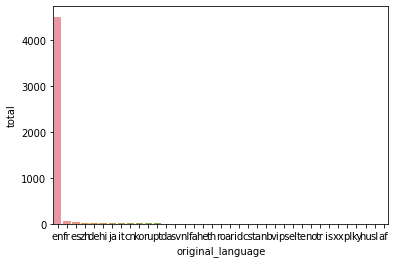

In [41]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

Abaixo, uma forma mais direta de plotarmos o mesmo gráfico.  
Neste caso, usamos o _dataframe_ tmdb de forma direta usando o _catplot_.

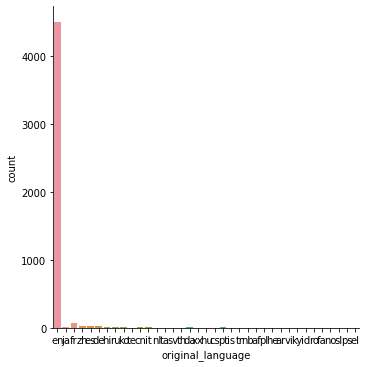

In [42]:
sns.catplot(x="original_language", kind="count", data=tmdb)

### 8.4. Melhorando a visualização dos dados
Primeiro, vamos a um exemplo ruim, o famoso gráfico de pizza.


([<matplotlib.patches.Wedge at 0x7fcdc3a20898>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

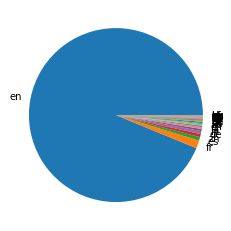

In [43]:
plt.pie(contagem_de_lingua['total'], labels= contagem_de_lingua['original_language'])

Montando um gráfico que compare o idioma inglês com os demais.  

In [52]:
total_por_lingua = tmdb['original_language'].value_counts()
total_de_ingles = total_por_lingua.loc['en']
total_geral = total_por_lingua.sum()
total_do_resto = total_geral - total_de_ingles

print('total de inglês', total_de_ingles)
print('total do resto', total_do_resto)

total de inglês 4505
total do resto 298


Montando um pequeno dicionário no python para exibir os dados.

In [53]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

Criando um _dataframe_ em cima desses dados.

In [54]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


Plotando o _dataframe_


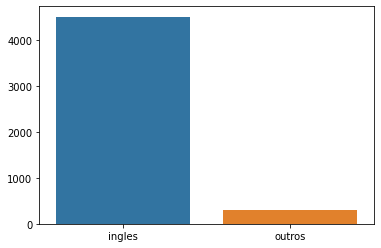

In [55]:
sns.barplot(data = dados, x='lingua', y='total')

### 8.5. Separando valores de um DataFrame
Abaixo, vamos separar os valores de lingua ingles dos demais idiomas.  
Isso pode ser feito através de uma _query_.

In [59]:
total_por_lingua_de_outros_filmes = tmdb.query('original_language != "en"').original_language.value_counts()
total_por_lingua_de_outros_filmes.head()

fr    70
es    32
de    27
zh    27
hi    19
Name: original_language, dtype: int64

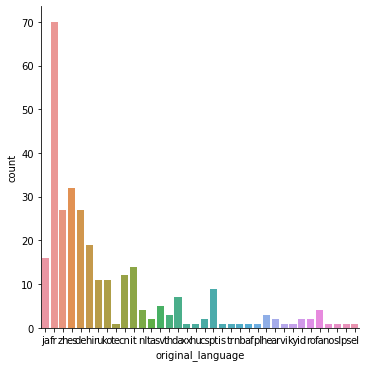

In [68]:
filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')
sns.catplot(data = filmes_sem_lingua_original_em_ingles, x='original_language', kind="count")


### 8.6. Refinando a apresentação
**Parametrização**  
* __aspect__ - alterando a dimensão do gráfico no eixo x
* __order__ - ordenação  
  * variável dos dilmes de outros idiomas ".index"
* __palette__ - estilizando as cores

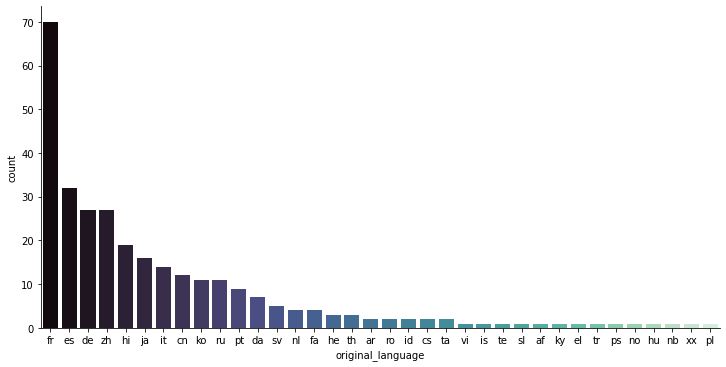

In [61]:
filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')
sns.catplot(x='original_language', kind='count', data= filmes_sem_lingua_original_em_ingles,
            aspect = 2,
            palette = 'mako',
            order = total_por_lingua_de_outros_filmes.index)

## Revisando o papel de média, mediana, desvio padrão, boxplot, histograma, tendência central e dispersão, como tudo isso se encaixa

In [69]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [79]:
notas_do_toy_story = notas.query("filmeId == 1")
notas_do_jumanji = notas.query('filmeId == 2')
print(notas_do_toy_story.head())
print(notas_do_jumanji.head())

print('notas do Toy Story {} e notas do Jumanji {}'.format(len(notas_do_toy_story), len(notas_do_jumanji)))

      usuarioId  filmeId  nota     momento
0             1        1   4.0   964982703
516           5        1   4.0   847434962
874           7        1   4.5  1106635946
1434         15        1   2.5  1510577970
1667         17        1   4.5  1305696483
      usuarioId  filmeId  nota     momento
560           6        2   4.0   845553522
1026          8        2   4.0   839463806
1773         18        2   3.0  1455617462
2275         19        2   3.0   965704331
2977         20        2   3.0  1054038313
110
notas do Toy Story 215 e notas do Jumanji 110


Calculando a média dos filmes Toy Story e Jumanji.  


In [84]:
print('Nota média do Toy Story %.2f' % notas_do_toy_story['nota'].mean())
print('Nota média do Jumanji %.2f' % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [86]:
print('Nota mediana do Toy Story %.2f' % notas_do_toy_story['nota'].median())
print('Nota mediana do Jumanji %.2f' % notas_do_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


A média e a mediana, muitas vezes não nos permite avaliar bem o comportamento dos valores que estamos analizando.  
Abaixo, importamos a biblioteca _NumPy_ e criamos alguns arrays para analisarmos.

In [106]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([1] * 10), np.array([5] * 10))

print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


Graficamente, podemos analisar melhor os nossos dados.

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

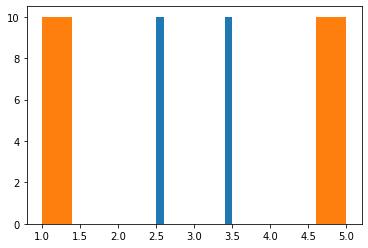

In [90]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7fcdc2e36160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcdc2e36b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcdc2e3f630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcdc2e3f2b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcdc2e36470>,
  <matplotlib.lines.Line2D at 0x7fcdc2e4c0f0>]}

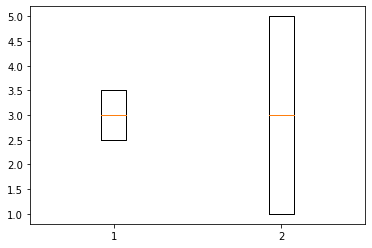

In [94]:
plt.boxplot([filme1, filme2])

Analisando graficamente os filmes Toy Story e Jumanji

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


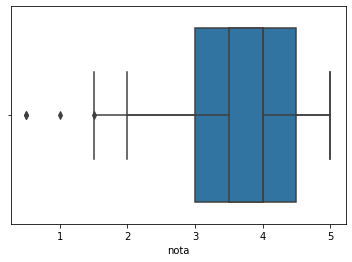

In [98]:
sns.boxplot(notas_do_toy_story['nota'])
sns.boxplot(notas_do_jumanji.nota)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fcdc2c2bf98>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcdc2be09b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcdc2be2470>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcdc2be20f0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcdc2be02b0>,
  <matplotlib.lines.Line2D at 0x7fcdc2be2eb8>]}

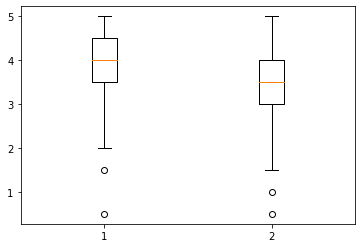

In [100]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

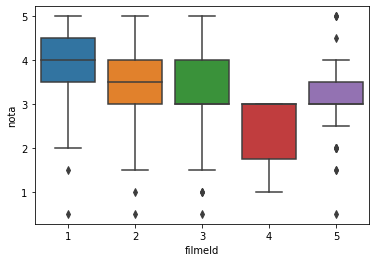

In [102]:
sns.boxplot(x='filmeId', y='nota', data = notas.query('filmeId in [1,2,3,4,5]'))

### Desvio Padrão


In [105]:
print(np.std(notas_do_toy_story.nota))
print(np.std(notas_do_jumanji.nota))

0.8329153449641146
0.8776965532969931
